In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data exploration and analysis preparation

#### Reading the data and converting them into a Dataframe 

In [3]:
# Load all dataframes 

from data_loader import load_dataset as load_all

other_road_users, sensors = load_all()
print('Loaded', len(other_road_users), 'other dataframes and', len(sensors), 'sensors dataframes')
print('Sample other_road_users keys:', list(other_road_users.keys())[:10])
print('Sample sensors keys:', list(sensors.keys())[:10])

Loaded 12 other dataframes and 12 sensors dataframes
Sample other_road_users keys: ['ebike_subject_a', 'ebike_subject_b', 'escooter_subject_b', 'escooter_subject_c', 'ebike_subject_e', 'escooter_subject_e', 'ebike_subject_g', 'escooter_subject_g', 'ebike_subject_h', 'escooter_subject_h']
Sample sensors keys: ['ebike_subject_a', 'ebike_subject_b', 'escooter_subject_b', 'escooter_subject_c', 'ebike_subject_e', 'escooter_subject_e', 'ebike_subject_g', 'escooter_subject_g', 'ebike_subject_h', 'escooter_subject_h']


In [4]:
# Example access to a specific dataframe
other_road_users['ebike_subject_b'].head()

,frame_index,track_id,class_name,angle,distance,x,y,x_inter,y_inter,x_inter_rts,y_inter_rts,vx_rts,vy_rts,interpolated,corrected_class
0,1,2998,Pedestrian,42.328393,4.288271,2.9,3.2,2.9,3.2,2.8,3.2,0.3,-0.7,False,Pedestrian
1,2,2998,Pedestrian,42.710642,4.170300,2.8,3.1,2.8,3.1,2.8,3.2,0.3,-0.7,False,Pedestrian
2,3,2998,Pedestrian,42.957475,4.144064,2.8,3.0,2.8,3.0,2.8,3.2,0.3,-0.7,False,Pedestrian
3,4,2998,Pedestrian,43.143703,4.109669,2.8,3.0,2.8,3.0,2.9,3.1,0.4,-0.7,False,Pedestrian
4,5,2998,Pedestrian,43.419702,4.115735,2.8,3.0,2.8,3.0,2.9,3.1,0.4,-0.8,False,Pedestrian


In [8]:
sensors['escooter_subject_b'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   timestamp                          459 non-null    int64  
 1   cts_gopro                          459 non-null    float64
 2   date_gopro                         459 non-null    object 
 3   GPS (Lat.) [deg]                   459 non-null    float64
 4   GPS (Long.) [deg]                  459 non-null    float64
 5   GPS (Alt.) [m]                     459 non-null    float64
 6   GPS (2D speed) [m/s]               459 non-null    float64
 7   precision                          459 non-null    int64  
 8   cts_gyro                           459 non-null    float64
 9   date_gyro                          459 non-null    object 
 10  Gyroscope (z) [rad/s]              459 non-null    float64
 11  Gyroscope (x) [rad/s]              459 non-null    float64

In [6]:
# Remove all the missing data in all the dataframes

for key in other_road_users:
    other_road_users[key] = other_road_users[key].dropna()
for key in sensors:
    sensors[key] = sensors[key].dropna()

## Description of the experimental condition 

### Question 3 : Provide a figure describing the experimental condition (initial position and path of each road user type).

Every Subject folder is a trial of an experiment, where we can observe the data of an ebike or an escooter. We have, for ebikes and escooters, 2 dataframes each times. Other_road_users describes interactions between the vehicle concerned and pedestrians. Sensors describes the physical datas of the vehicle. 

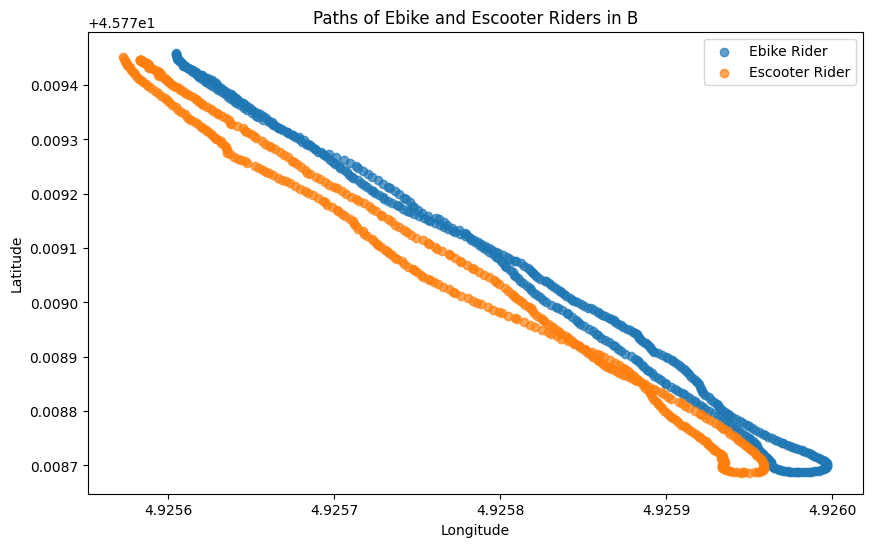

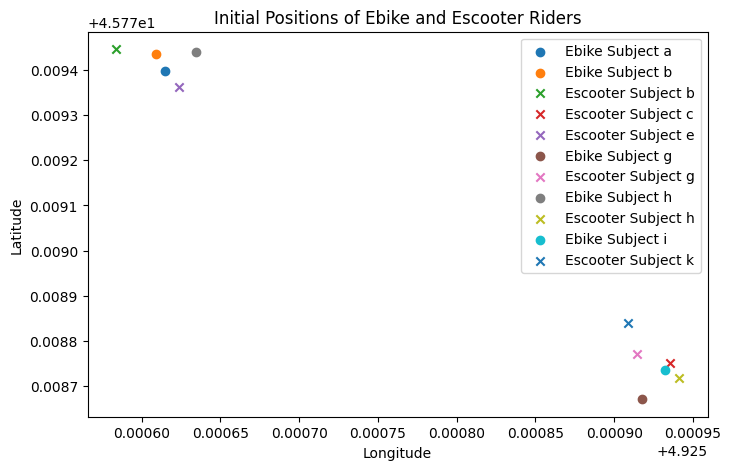

In [19]:
#plot the path of ebike and escooter in subject b
plt.figure(figsize=(10, 6))
plt.scatter(sensors['ebike_subject_b']['GPS (Long.) [deg]'], sensors['ebike_subject_b']['GPS (Lat.) [deg]'], label='Ebike Rider', alpha=0.7)
plt.scatter(sensors['escooter_subject_b']['GPS (Long.) [deg]'], sensors['escooter_subject_b']['GPS (Lat.) [deg]'], label='Escooter Rider', alpha=0.7)
plt.title('Paths of Ebike and Escooter Riders in B') 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#now plot only the initial position of the ebike and escooter riders (first data point) in all the subjects (a, b, c, e, g, h, i, k)
plt.figure(figsize=(8, 5))
# if there is no data for a ebike or escooter in a subject, skip it
subjects = ['a', 'b', 'c', 'e', 'g', 'h', 'i', 'k']
for subject in subjects:
    ebike_key = f'ebike_subject_{subject}'
    escooter_key = f'escooter_subject_{subject}'
    if ebike_key in sensors and not sensors[ebike_key].empty:
        plt.scatter(sensors[ebike_key]['GPS (Long.) [deg]'].iloc[0], sensors[ebike_key]['GPS (Lat.) [deg]'].iloc[0], label=f'Ebike Subject {subject}', marker='o')
    if escooter_key in sensors and not sensors[escooter_key].empty:
        plt.scatter(sensors[escooter_key]['GPS (Long.) [deg]'].iloc[0], sensors[escooter_key]['GPS (Lat.) [deg]'].iloc[0], label=f'Escooter Subject {subject}', marker='x')
plt.title('Initial Positions of Ebike and Escooter Riders')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()